# IMDB Review Sentiment Analysis


- Student name: Johnny Dryman
- Student pace: full time
- Scheduled project review date/time: 5/27/2021
- Instructor name: James Irving

## Business Problem

IMDB is the world's most popular and authoritative source for movie, TV and celebrity content, designed to help fans explore the world of movies and shows and decide what to watch.

One of the most popular features on the site is its user reviews.  Users are able to give each movie a score between 0-10 along with a written review.  The average score is a recognized metric in the industry, and IMDB's top movies based on user reviews is a coveted spot for impactful films.

One of the issues inherent with user submitted scores is that the 0-10 rating system might mean different things to different reviewers.  For example, one reviewer think that a 'good' movie deserves a 6/10, and another might think a 'good' movie deserves an 8/10.  Every user has their own evaluation metrics, and this is often determined internally rather than by a specific standard.

## Natural Language Processing

Using Natural Language Processing (NLP), we can create machine learning models that might help us get closer at the core truth of what people are saying with their written reviews.  

Although not as verbose as a scale form 0-10, we found a dataset where 50,000 IMDB reviews were denoted as 'positive' or 'negative.'  Using this dataset, we can train a model to classify reviews as positive or negative.  In theory, distilling the reviews in this fashion would help us to generate a score based on true sentimentality rather than a sliding scale that has different meanings to different users.

# Packages

We will first want to install the Python packages we will need to perform data import, exploraty data analysis, machine learning modeling, and natural language processing.  

In [1]:
#Standard python libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action='ignore') 

# Preprocessing tools
from sklearn.model_selection import train_test_split,cross_val_predict,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
scaler = StandardScaler()
from sklearn import metrics

# # Models & Utilities
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Warnings
import warnings
warnings.filterwarnings(action='ignore') 

# NLP Libraries
import nltk
import collections
nltk.download('punkt')
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
from nltk import regexp_tokenize
import re
from nltk.corpus import stopwords
from nltk.collocations import *
from nltk import FreqDist
from nltk import word_tokenize
from nltk import ngrams
import string
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
# !pip install wordcloud
from wordcloud import WordCloud


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Johnny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Johnny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
# Import .csv file obtained from Kaggle
df = pd.read_csv('data/IMDB Dataset.csv')

# View first 5 rows
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [53]:
# Taking a look at our columns
print(df.info())

# Checking for NA data
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
review       0
sentiment    0
dtype: int64


Fortunately our data has no nulls that we need to worry about.

In [54]:
# View class balance
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

The reviews are also very balanced across positive and negative sentiment.

In [55]:
# View pandas 'describe' to check for data issues
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


There are a few hundred duplicates in the data.  Removing them will not violate any data science best practices.

In [63]:
# Drop duplicates from dataframe
df = df.drop_duplicates()

# Text Preprocessing

One of the most crucial aspects of NLP is preparing the data for machine learning models.  To do this, we will need to remove punctuation, symbols, and 'stopwords' - common English language words that while important for communication, are less helpful our models.  

In [64]:
# Taking a glance at the first 500 characters of our first review
first_review = df['review'][0][0:500]
first_review

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ"

Let's take a look at how NLTK, a robust Python library for NLP, will 'tokenize' our first review.  Tokenization is the process of splitting our reviews into a list of strings rather than one large string.  

In [65]:
## From tjhe lessons
from nltk import regexp_tokenize
pattern = r"([a-zA-Z]+(?:'[a-z]+)?)"
regexp_tokenize(first_review,pattern)

['One',
 'of',
 'the',
 'other',
 'reviewers',
 'has',
 'mentioned',
 'that',
 'after',
 'watching',
 'just',
 'Oz',
 'episode',
 "you'll",
 'be',
 'hooked',
 'They',
 'are',
 'right',
 'as',
 'this',
 'is',
 'exactly',
 'what',
 'happened',
 'with',
 'me',
 'br',
 'br',
 'The',
 'first',
 'thing',
 'that',
 'struck',
 'me',
 'about',
 'Oz',
 'was',
 'its',
 'brutality',
 'and',
 'unflinching',
 'scenes',
 'of',
 'violence',
 'which',
 'set',
 'in',
 'right',
 'from',
 'the',
 'word',
 'GO',
 'Trust',
 'me',
 'this',
 'is',
 'not',
 'a',
 'show',
 'for',
 'the',
 'faint',
 'hearted',
 'or',
 'timid',
 'This',
 'show',
 'pulls',
 'no',
 'punches',
 'with',
 'regards',
 'to',
 'drugs',
 'sex',
 'or',
 'violence',
 'Its',
 'is',
 'hardcore',
 'in',
 'the',
 'classic',
 'use',
 'of',
 'the',
 'word',
 'br',
 'br',
 'It',
 'is',
 'called',
 'OZ']

In [66]:
# stop_words_list = stopwords.words('english')

# stop_words_list.append('br')

In [67]:
# tokens = regexp_tokenize(first_review, pattern)

# tokens

# bad_tags = ['br']

# cleaned_tokens = []

# for token in tokens:
#     if token not in bad_tags:
#         cleaned_tokens.append(token)
        
# cleaned_tokens[0:5]
    

['One', 'of', 'the', 'other', 'reviewers']

In [110]:
stop_words_list = stopwords.words('english')

remove_words = ["i've", "i'm", 'br']

stop_words_list += remove_words

stop_words_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Tokenizer

By creating a tokenizer function, we will be able to repeat the tokenization process for without breaking down the entire process.  This will also allow us to insert a tokenizer into our TF-IDF and Count Vectorizers later in this notebook.  Should we choose, this method will also allow us to evaluate the performance of our models with different tokenizers or a modified version of this one.  

In [116]:
# Define tokenizer function
def my_tokenizer(review, stop_words=False, 
                 stop_words_add=[],
                 remove_words=remove_words, show_full=False):
    
    # Determine pattern for regexp_tokenize
    pattern = r"([a-zA-Z]+(?:'[a-z]+)?)"

    # Convert review into tokens based on our pattern
    tokens = regexp_tokenize(review, pattern)

    # Instantiating empty stopwords list
    stop_words_list = []

    # Option to insert stopwords for testing
    # Stop words will be listed separately for our vectorizer
    if stop_words == True:            
        stop_words_list = stopwords.words('english')
        stop_words_list += stop_words_add

    # Remove additional words from our tokens based on remove_words list
    stop_words_list += remove_words
    [x.lower() for x in stop_words_list]
    cleaned_tokens = []

    # Add word to token list if word not in stop words list
    for token in tokens:
        if token.lower() not in stop_words_list:
            cleaned_tokens.append(token.lower())
    
    # Return tokens with option to preview
    if show_full == False:
        return cleaned_tokens
    else:
        return " ".join(cleaned_tokens)#, stop_words_list

# Print before and after tokenization
print("First review before tokenization:")
print('')
print(first_review)
print('')
print("First review after tokenization:")
print('')
print(my_tokenizer(first_review, stop_words=True, 
             stop_words_add=[], show_full=True))

First review before tokenization:

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ

First review after tokenization:

one reviewers mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz


Tokenization has cut our word count significantly and has removed elements that will not be helpful for our machine learning models.

We will leave our original review data intact while also creating a separate column with tokenized reviews.  This will make it easier to perform our exploratory data analysis.

In [117]:
# Create new column with tokenized reviews
df['reviews_t'] = df['review'].apply(lambda text: my_tokenizer(text, stop_words=True))

# Preview first 5
df['reviews_t'].head()

0        [one, reviewers, mentioned, watching, oz, epis...
1        [wonderful, little, production, filming, techn...
2        [thought, wonderful, way, spend, time, hot, su...
3        [basically, there's, family, little, boy, jake...
4        [petter, mattei's, love, time, money, visually...
                               ...                        
49995    [thought, movie, right, good, job, creative, o...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [catholic, taught, parochial, elementary, scho...
49998    [going, disagree, previous, comment, side, mal...
49999    [one, expects, star, trek, movies, high, art, ...
Name: reviews_t, Length: 49582, dtype: object

# Exploratory Data Analysis

Now that we have our tokenized reviews, we can dig into the reviews to see what we can learn.

First, we'll split our reviews between positive and negative classifiers.  There will be instances where we'll want to see how they're different and also instances where we'll want to examine the entire corpus.

In [124]:
# Create new dataframes separating positive and negative reviews
df_pos = df['reviews_t'].loc[df['sentiment'] == 'positive']
df_neg = df['reviews_t'].loc[df['sentiment'] == 'negative']

# Instantiating emptoy positive / negative / total token lists
tokens = []
tokens_pos = []
tokens_neg = []

# Populating token lists from p/n/t dataframes
for row in df['reviews_t']:
    tokens.extend(row)
for row in df_pos:
    tokens_pos.extend(row)
for row in df_neg:
    tokens_neg.extend(row)

# Print number of p/n tokens
print(f'Total corpus tokens: {len(tokens)}')
print(f'Number of positive tokens: {len(tokens_pos)}')
print(f'Number of negative tokens: {len(tokens_neg)}')

Total corpus tokens: 5903613
Number of positive tokens: 3005174
Number of negative tokens: 2898439


## Frequency Distribution

Frequency distributions will show us how often tokens appear in our reviews.  The results can be informative especially when comparing between classifiers.  

In [134]:
# Instantiating p/n FreqDists
corpus_freqdist = FreqDist(tokens)
pos_freqdist = FreqDist(tokens_pos)
neg_freqdist = FreqDist(tokens_neg)

In [142]:
# View top 20 most frequent terms in p/n
print("Top 20 most frequent terms in positive reviews:")
print(pos_freqdist.most_common(20))
print('')
print("Top 20 most frequent terms in negative reviews:")
print(neg_freqdist.most_common(20))

Top 20 most frequent terms in positive reviews:
[('film', 40890), ('movie', 37300), ('one', 26920), ('like', 17651), ('good', 14965), ('great', 12888), ('story', 12835), ('time', 12693), ('well', 12682), ('see', 12212), ('also', 10761), ('really', 10707), ('would', 10425), ('even', 9574), ('first', 9186), ('much', 9176), ('love', 8649), ('people', 8519), ('best', 8478), ('get', 8234)]

Top 20 most frequent terms in negative reviews:
[('movie', 49173), ('film', 36318), ('one', 25776), ('like', 22192), ('even', 15095), ('good', 14576), ('bad', 14563), ('would', 13611), ('really', 12216), ('time', 12197), ('see', 10589), ('story', 10032), ('get', 9990), ('much', 9977), ('make', 9263), ('people', 9185), ('could', 8958), ('made', 8707), ('well', 8424), ('first', 8246)]


Interestingly, the most frequently used language between positive and negative reviews is mostly shared.  Even the word 'good' appears in our negative reviews 14,576 times.  There are some words that aren't quite as useful such as 'like,'would,' 'even,' etc. but these are still useful in computing ngrams, so we will leave them in our dataset.

It's worth taking a brief look at the normalized frequency as well.

In [136]:
total_word_count = sum(review_freqdist.values())
review_top_10 = review_freqdist.most_common(10)
print('Word\t\t\tNormalized Frequency')
for word in review_top_10:
    normalized_frequency = word[1] / total_word_count
    print('{} \t\t\t {:.4}'.format(word[0], normalized_frequency))

Word			Normalized Frequency
movie 			 0.01465
film 			 0.01308
one 			 0.008926
like 			 0.006749
good 			 0.005004
time 			 0.004216
even 			 0.004179
would 			 0.004071
really 			 0.003883
story 			 0.003873


This isn't particularly helpful, but we can see that 'movie' and 'film' both appear a little more than once every 100 words, which isn't too surprising.

## Word Clouds

While not the most informative in a statistical sense, word clouds are engaging visuals that allow for a much more digestible interpretation of the most frequently used words in any given corpus.  It's worth taking a look to see if anything strikes us.

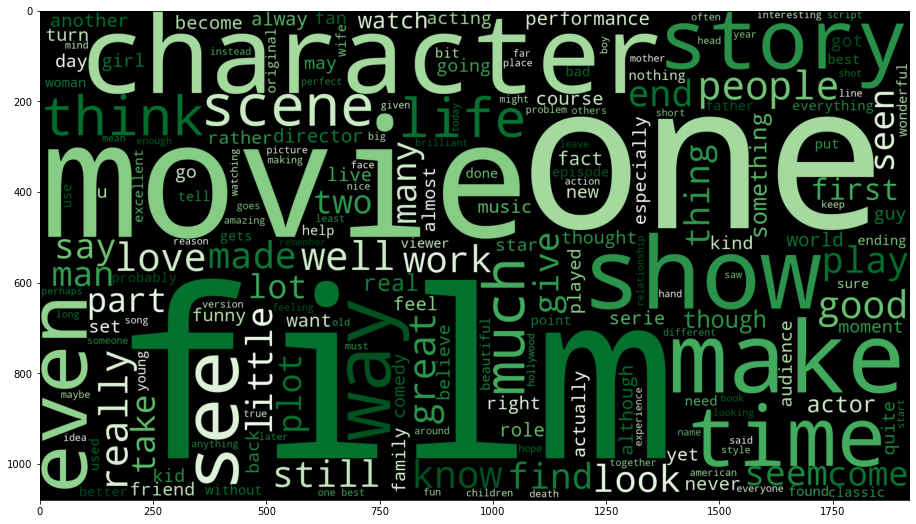

In [143]:
def draw_wordcloud(tokens, colormap):
    
    # Instantiate plot
    plt.figure(figsize = (16,9))
    
    # Instantiate wordcloud
    wc = WordCloud(max_words = 200, 
                   width = 1920, height = 1080, 
                   colormap=colormap).generate(" ".join(tokens_pos))
    
    #Show wordcloud
    plt.imshow(wc)

draw_wordcloud(tokens_pos, "Greens")

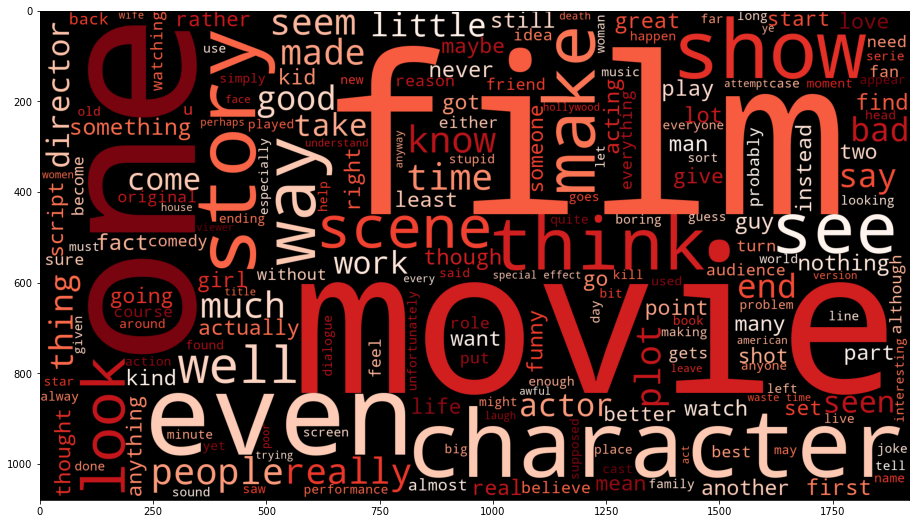

In [140]:
draw_wordcloud(tokens_neg, "Reds")

Aside from the color palettes, the results match what we found in our frequency distributions.

## Ngrams

Ngrams are another useful tool for exploratory analysis.  Instead of singular tokens, ngrams demonstrate the frequency of specific phrases.  Let's take at ngrams with one, two, three, and four words with our positive and negative dataframes.

In [83]:
n_gram = (pd.Series(nltk.ngrams(tokens, 2)).value_counts())[:7]

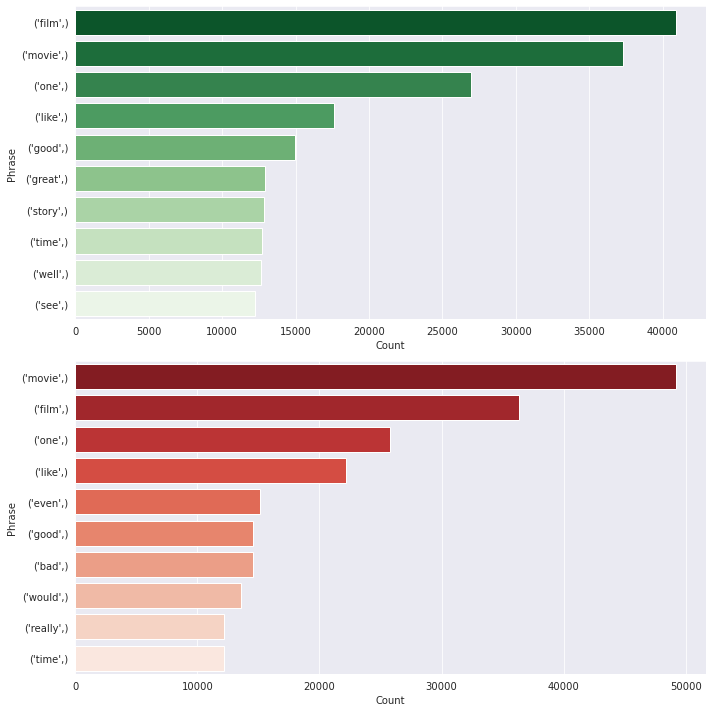

In [209]:
def plot_ngram(i, tokens_pos=tokens_pos, tokens_neg=tokens_neg):
    
    # Setting up ngrams depending on our specified value for 'i'
    n_gram_pos = (pd.Series(nltk.ngrams(tokens_pos, i)).value_counts())[:10]
    n_gram_neg = (pd.Series(nltk.ngrams(tokens_neg, i)).value_counts())[:10]
    
    # Creating p/n dataframes
    n_gram_df_pos = pd.DataFrame(n_gram_pos)
    n_gram_df_neg = pd.DataFrame(n_gram_neg)
    
    # Resetting index for labeling on plots
    n_gram_df_pos = n_gram_df_pos.reset_index()
    n_gram_df_neg = n_gram_df_neg.reset_index()
    
    # Renaming plots
    n_gram_df_pos = n_gram_df_pos.rename(columns={'index': 'Phrase', 0: 'Count'})
    n_gram_df_neg = n_gram_df_neg.rename(columns={'index': 'Phrase', 0: 'Count'})
    
    # Setting seaborn grid style to 'darkgrid'
    with sns.axes_style('darkgrid'):
        
        # Setting up two figures to stack on top of each other
        fig = plt.figure(figsize = (10,10))
        ax1 = fig.add_subplot(211)
        ax2 = fig.add_subplot(212)
        
        # Assigning each barplot to positive and negative ngram sets
        sns.barplot(ax=ax1, x='Count',y='Phrase', data=n_gram_df_pos, palette='Greens_r')
        sns.barplot(ax=ax2, x='Count',y='Phrase', data=n_gram_df_neg, palette='Reds_r')
    
    # Return plot with tight layout
    plt.tight_layout()

plot_ngram(1)

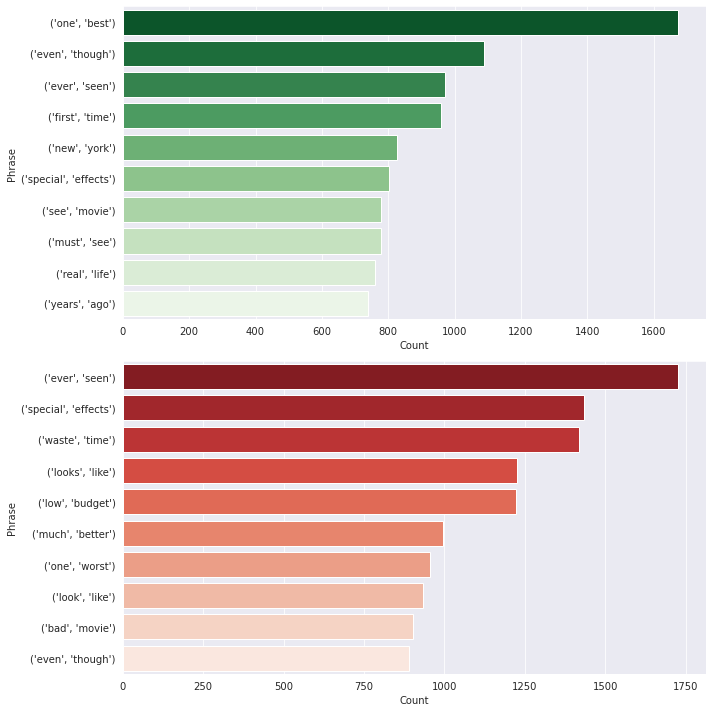

In [164]:
plot_ngram(2)

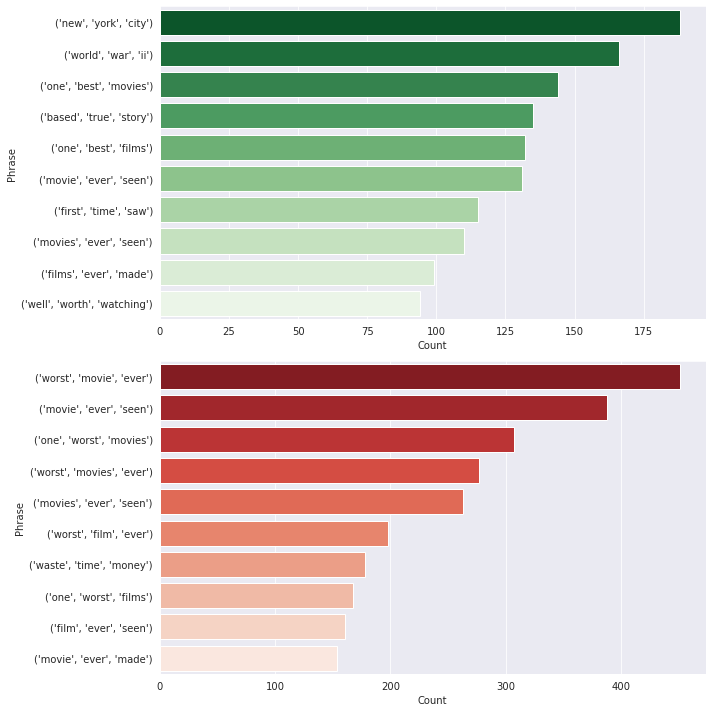

In [165]:
plot_ngram(3)

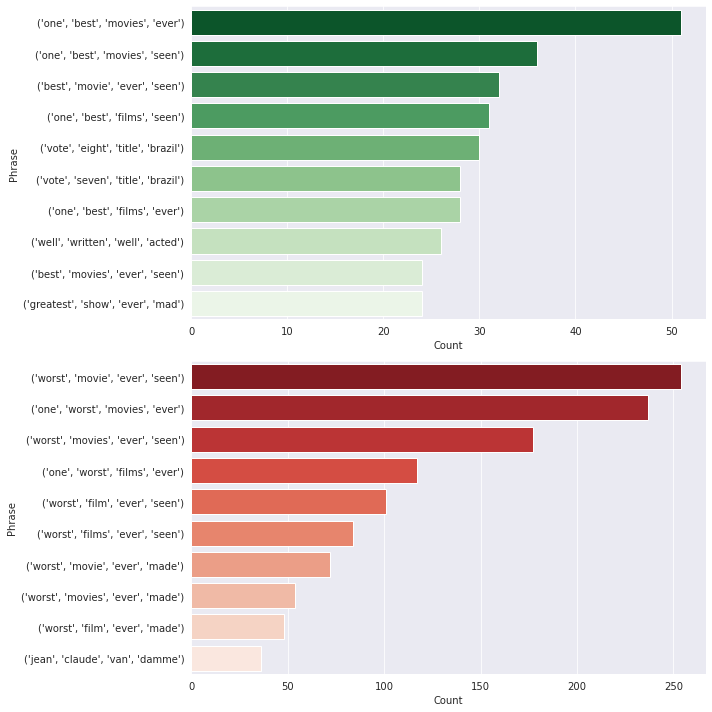

In [166]:
plot_ngram(4)

Finally, the differences in positive and negative tokens are becoming more evident.  

Ngrams(3) shows us more interesting information.  New York City appears as the top most frequent among trigrams, as does World War II.  The rest are superlative - "one best films," "movie ever seen," "films ever made."  

The negative trigrams are more superlative and don't include things we wouldn't normally expect like New York City and WWII.  This might make us curious about whether or not movies based in New York City are more well reviewed, and if World War II movies also receive a similar boost.  Perhaps fans of movies portraying NYC and WWII are more likely to write positive reviews.

Adorably, Jean Claude Van Damme is a commmon negative ngram(4).

## Mutual Information Scores

Pairwise mutual information scores are also worth a quick look.  This will give us a measure of association between two tokens.

In [210]:
# Instantiating NLTK's Bigramn Association Measures
bigram_measures = nltk.collocations.BigramAssocMeasures()

# Instantiating Bigram Collocation Finder
tokens_pmi_finder = BigramCollocationFinder.from_words(tokens)

# Applying a frequency filter - bigram must appear at least 500 times
tokens_pmi_finder.apply_freq_filter(500)

# Scoring the tokens based on our bigram measures
tokens_pmi_scored = tokens_pmi_finder.score_ngrams(bigram_measures.pmi)

# Show scores
tokens_pmi_scored

[(('sci', 'fi'), 12.014985625405476),
 (('th', 'century'), 10.941059050317797),
 (('production', 'values'), 9.938295540111962),
 (('low', 'budget'), 9.617255903440476),
 (('special', 'effects'), 9.442463595883456),
 (('new', 'york'), 9.437849429863778),
 (('high', 'school'), 8.821587200156959),
 (('highly', 'recommend'), 8.735826357910884),
 (('years', 'ago'), 8.705289579685402),
 (('black', 'white'), 8.56233814091226),
 (('supporting', 'cast'), 8.237654151722769),
 (('half', 'hour'), 8.223432319941598),
 (('year', 'old'), 7.977964402482492),
 (('character', 'development'), 7.918511003378143),
 (('read', 'book'), 7.718890452656954),
 (('takes', 'place'), 7.602421569135796),
 (('writer', 'director'), 7.505539139359406),
 (('worth', 'seeing'), 7.297108484893386),
 (('camera', 'work'), 7.150295316173729),
 (('years', 'later'), 7.116356389401524),
 (('anything', 'else'), 7.106818491593305),
 (('waste', 'time'), 7.003592480433181),
 (('worth', 'watching'), 6.904774014077198),
 (('main', 'ch

# Modeling

## TF - IDF

In [89]:
## set up text preprocessing pipeline

tfidf = TfidfVectorizer(strip_accents='unicode', 
                        tokenizer=my_tokenizer, 
                        stop_words=stop_words_list
                            )

X = df['review']
y = df['sentiment']

# Do train test split here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

# Fit both x train and test
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)




In [90]:
# Logistic Regression with TF-IDF Vectoriser
tfidf_log = LogisticRegression(penalty='l2',C=10)
tfidf_log.fit(X_train_tfidf, y_train)

LogisticRegression(C=10)

In [91]:
def evaluate_model(model, X_train=X_train, X_test=X_test, y_train=y_train, 
                   y_test=y_test, cmap='Greens', normalize='true',
                   classes=None,figsize=(10,4)):
    
    # Print model accuracy
    print(f'Training Accuracy: {model.score(X_train,y_train):.2%}')
    print(f'Test Accuracy: {model.score(X_test,y_test):.2%}')
    print('')
    
    # Print classification report
    y_test_predict = model.predict(X_test)
    print(metrics.classification_report(y_test, y_test_predict,
                                        target_names=classes))
    
    # Plot confusion matrix
    fig,ax = plt.subplots(ncols=2,figsize=figsize)
    metrics.plot_confusion_matrix(model, X_test,y_test,cmap=cmap, 
                                  normalize=normalize,display_labels=classes,
                                  ax=ax[0])
    
    #Plot ROC curves
    with sns.axes_style("darkgrid"):
        curve = metrics.plot_roc_curve(model,X_train,y_train,ax=ax[1])
        curve2 = metrics.plot_roc_curve(model,X_test,y_test,ax=ax[1])
        curve.ax_.grid()
        curve.ax_.plot([0,1],[0,1],ls=':')
        fig.tight_layout()
        plt.show()

Training Accuracy: 98.81%
Test Accuracy: 89.27%

              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      7422
    positive       0.88      0.90      0.89      7453

    accuracy                           0.89     14875
   macro avg       0.89      0.89      0.89     14875
weighted avg       0.89      0.89      0.89     14875



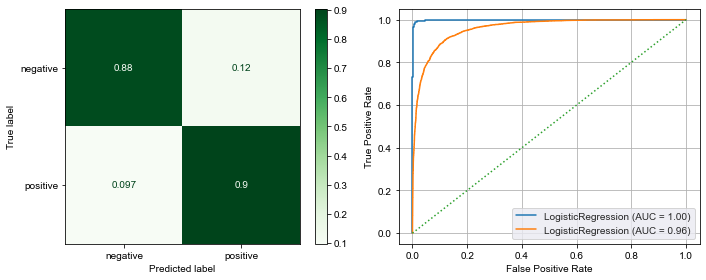

In [92]:
evaluate_model(tfidf_log, X_train=X_train_tfidf, X_test=X_test_tfidf)

In [93]:
feature_names = tfidf.get_feature_names()
feature_names

df_coef = pd.DataFrame()

df_coef['features'] = feature_names
df_coef['coefficients'] = tfidf_log.coef_.flatten()

df_coef.sort_values(by='coefficients', ascending=False)

,features,coefficients
27700,excellent,11.641220
34870,great,11.243282
61781,perfect,10.045060
38009,hilarious,10.004170
2309,amazing,9.765448
...,...,...
82963,terrible,-10.316837
9456,boring,-11.348241
5218,awful,-13.200745
90478,waste,-15.084933


## Model Iteration

In [94]:
run = False

# Initiate new model and perform grid search
tfidf_log_hp = LogisticRegression(random_state=8)


if run == True:

# Define lists of parameters to compare
    params = {'C':[0.01,0.1,1,10,100],
            'penalty':['l1','l2','elastic_net'],
            'solver':["liblinear", "newton-cg", "lbfgs", "sag","saga"]
             }
    
else:
    params = {'C':[100],
            'penalty':['l2'],
            'solver':["newton-cg"]
             }
    
# 'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'

# Run the grid search with a focus on accuracy
log_grid_search = GridSearchCV(tfidf_log_hp,params,scoring='accuracy',
                              verbose=100,
                              n_jobs=-1)

# Fit grid search to training data and display best parameters
log_grid_search.fit(X_train_tfidf, y_train)

# Print best parameters
log_grid_search.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.2s remaining:   21.3s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   14.7s remaining:    9.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.3s finished


{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [95]:
# 'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'

In [96]:
log_grid_search.best_score_

0.8879478226386113

Training Accuracy: 100.00%
Test Accuracy: 88.16%

              precision    recall  f1-score   support

    negative       0.89      0.87      0.88      7422
    positive       0.87      0.89      0.88      7453

    accuracy                           0.88     14875
   macro avg       0.88      0.88      0.88     14875
weighted avg       0.88      0.88      0.88     14875



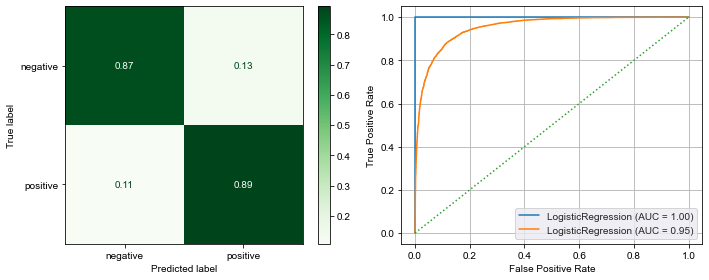

In [97]:
evaluate_model(log_grid_search.best_estimator_, X_train=X_train_tfidf, X_test=X_test_tfidf)

## Count Vectorizer

In [98]:
## set up text preprocessing pipeline

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(strip_accents='unicode',
                              tokenizer=my_tokenizer,

                             stop_words=stop_words_list
                            )

# X = df['review']
# y = df['sentiment']

# X

# # Do train test split here
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

# Fit both x train and test
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)




In [99]:
# X_train_cv

In [100]:
# Logistic Regression with Count Vectoriser
cv_log = LogisticRegression(penalty='l2',C=10)
cv_log.fit(X_train_cv, y_train)

LogisticRegression(C=10)

Training Accuracy: 99.99%
Test Accuracy: 86.98%

              precision    recall  f1-score   support

    negative       0.88      0.86      0.87      7422
    positive       0.86      0.88      0.87      7453

    accuracy                           0.87     14875
   macro avg       0.87      0.87      0.87     14875
weighted avg       0.87      0.87      0.87     14875



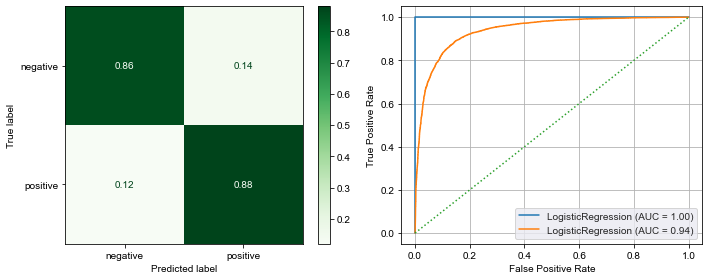

In [101]:
evaluate_model(cv_log, X_train=X_train_cv, X_test=X_test_cv)

## XGBoost

In [ ]:
model_xgb_tf = XGBClassifier() #Default XGBoost Model with TF_IDF
model_xgb_tf.fit(X_train_tfidf, y_train)

evaluate_model(model_xgb_tf, X_train=X_train_tfidf, X_test=X_test_tfidf)

In [ ]:
model_xgb_cv = XGBClassifier() #Default XGBoost Model with TF_IDF
model_xgb_cv.fit(X_train_tfidf, y_train)

evaluate_model(model_xgb_cv, X_train=X_train_cv, X_test=X_test_cv)

In [ ]:
# Create compare model function

def model_compare(base_model, grid_search_model):
    
    # Calculate accuracies
    base_score = base_model.score(X_test, y_test)
    grid_score = grid_search_model.score(X_test, y_test)
    
    #Print accuracies
    print("--- Base Model ---")
    model_accuracy(base_model)
    print('')
    print("--- Grid Search Model ---")
    model_accuracy(grid_search_model)
    print('')
    
    # If/else function to display best model and score improvement
    if base_score < grid_score:    
        print(f'Our grid search model outperformed our base model by {(grid_score - base_score):.2%}')
    else:
        print(f'Our base model outperformed our grid search model by {(base_score - grid_score):.2%}')
    
# model_compare(model_log, log_grid_search.best_estimator_)

In [ ]:
# If run = True, code will perform full grid search
# If run = False, code will use previously calculated best parameters
run = False

# Instantiate new model for hyperparameter tuning
model_xgb_hp = XGBClassifier(random_state=8)

# Define grid search parameters
if run == True:
    param_grid = {
        'learning_rate': [0.0001, 0.001, 0.01, 0.1],
        'max_depth': [3, 5, 7, 9],
        'min_child_weight': [1, 2],
        'subsample': [0.5, 0.7, 1],
        'n_estimators': [10, 100, 1000]}
else:
    param_grid = {
        'learning_rate': [0.01],
        'max_depth': [5],
        'min_child_weight': [2],
        'subsample': [0.5],
        'n_estimators': [100]}

# Create grid search and train
xgb_grid_search = GridSearchCV(model_xgb_hp, param_grid, scoring='accuracy', 
                               cv=5, n_jobs=-1, verbose=100)
xgb_grid_search.fit(X_train_tfidf, y_train)

# # Print metrics
# model_compare(model_xgb_tf, xgb_grid_search.best_estimator_)
# print("")
# print(f"Cross Validated Score: {xgb_grid_search.best_score_ :.2%}")
# print("")
# print(f"Optimal Parameters: {xgb_grid_search.best_params_}")

In [ ]:
print("")
print(f"Cross Validated Score: {xgb_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {xgb_grid_search.best_params_}")

In [ ]:
# model_compare(model_xgb_tf, xgb_grid_search.best_estimator_)
# print("")
# print(f"Cross Validated Score: {xgb_grid_search.best_score_ :.2%}")
# print("")
# print(f"Optimal Parameters: {xgb_grid_search.best_params_}")

In [ ]:
X_train_tfidf

# Word analysis

## Frequency Distribution

## Normalized word frequency

## Bigrams

## Mutual information scores



### TF-IDF vectorization
#### Visualize Vector


### bag of words

## Models

# Scratch

## Random Forest

In [ ]:
# Initiate a random forest model
model_rf = RandomForestClassifier(random_state=8)
model_rf.fit(X_train_tfidf, y_train)

# model_accuracy(model_rf)

In [ ]:
evaluate_model(model_rf, X_train=X_train_tfidf, X_test=X_test_tfidf)

In [ ]:
# params = {
#     'n_estimators': [10, 50, 100, 150],
#     'max_depth': [10, 20, 50, None],
#     'min_samples_split': [5, 30]
# }

# clf_rf = RandomForestClassifier()
# gs_rf = GridSearchCV(clf_rf, param_grid=params, scoring='f1_macro', cv=3, verbose=3)
# gs_rf.fit(X_train_tfidf, y_train)

In [ ]:
# gs_rf.best_score_

In [ ]:
# gs_rf.best_params_

## LSTM

In [ ]:
embedding_vecor_length = 32
callback = EarlyStopping(monitor='val_loss', patience=2)

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

In [ ]:
model.fit(X_train1, y_train, epochs=10, batch_size=256,verbose = 1,validation_data=(X_valid1,y_valid),callbacks=[callback])

In [ ]:
accuracy_score(y_test, model.predict_classes(X_test1))

In [ ]:
plot_history(history)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
 
sentence_1="This is a good job.I will not miss it for anything"
sentence_2="This is not good at all"
 
 
 
#without smooth IDF
print("Without Smoothing:")
#define tf-idf
tf_idf_vec = TfidfVectorizer(use_idf=True, 
                        smooth_idf=False,  
                        ngram_range=(1,1),stop_words='english') # to use only  bigrams ngram_range=(2,2)
#transform
tf_idf_data = tf_idf_vec.fit_transform([sentence_1,sentence_2])
 
#create dataframe
tf_idf_dataframe=pd.DataFrame(tf_idf_data.toarray(),columns=tf_idf_vec.get_feature_names())
print(tf_idf_dataframe)
print("\n")
 
#with smooth
tf_idf_vec_smooth = TfidfVectorizer(use_idf=True,  
                        smooth_idf=True,  
                        ngram_range=(1,1),stop_words='english')
 
 
tf_idf_data_smooth = tf_idf_vec_smooth.fit_transform([sentence_1,sentence_2])
 
print("With Smoothing:")
tf_idf_dataframe_smooth=pd.DataFrame(tf_idf_data_smooth.toarray(),columns=tf_idf_vec_smooth.get_feature_names())
print(tf_idf_dataframe_smooth)


In [ ]:
def plot_coefficients(classifier, feature_names, top_features=20):

    # Access the coefficients from classifier
    coef = classifier.coef_

    # Access the classes
    classes = classifier.classes_

    # Iterate the loop for number of classes
    for i in range(len(classes)):

        i = 0
        print(classes[i])

        # Access the row containing the coefficients for this class
        class_coef = coef[i]


        # Below this, I have just replaced 'i' in your code with 'class_coef'
        # Pass this to get top and bottom features
        top_positive_coefficients = np.argsort(class_coef)[-top_features:]
        top_negative_coefficients = np.argsort(class_coef)[:top_features]

        # Concatenate the above two 
        top_coefficients = np.hstack([top_negative_coefficients, 
                                      top_positive_coefficients])
        # create plot
        plt.figure(figsize=(10, 3))

        colors = ["red" if c < 0 else "blue" for c in class_coef[top_coefficients]]
        plt.bar(np.arange(2 * top_features), class_coef[top_coefficients], color=colors)
        feature_names = np.array(feature_names)

        # Here I corrected the start to 0 (Your code has 1, which shifted the labels)
        plt.xticks(np.arange(1, 1 + 2 * top_features), 
                   feature_names[top_coefficients], rotation=60, ha="right")
        plt.show()
        
plot_coefficients(tfidf_log, tfidf.get_feature_names(), top_features=20)

### 25 most common words in positive and negative reviews

In [ ]:

# ax = neg_freq_df.set_index('Word').sort_values('Frequency').plot(kind='barh')
# ax.set(title="25 Most Common Words in Negative Tweets")

### Word clouds pos / neg

### visualize TSNE

### mean word length postive or negative?.  bucket and histogram?

### Same with word unique percentage

Sentiment across word count

Word count histogram



In [ ]:
df

In [ ]:
run = False

if run == True:

    ## Indirect features
    eng_stopwords = set(stopwords.words("english"))

    df['count_sent']=df["review"].apply(lambda x: len(re.findall("\n",str(x)))+1)
    #Word count in each comment:
    df['count_word']=df["review"].apply(lambda x: len(str(x).split()))
    #Unique word count
    df['count_unique_word']=df["review"].apply(lambda x: len(set(str(x).split())))
    #Letter count
    df['count_letters']=df["review"].apply(lambda x: len(str(x)))
    #punctuation count
    df["count_punctuations"] =df["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
    #upper case words count
    df["count_words_upper"] = df["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
    #title case words count
    df["count_words_title"] = df["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
    #Number of stopwords
    df["count_stopwords"] = df["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
    #Average length of the words
    df["mean_word_len"] = df["review"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
    #Word count percent in each comment:
    df['word_unique_percent']=df['count_unique_word']*100/df['count_word']
    #Punct percent in each comment:
    df['punct_percent']=df['count_punctuations']*100/df['count_word']
    #derived features
    #Word count percent in each comment:
    df['word_unique_percent']=df['count_unique_word']*100/df['count_word']
    #derived features
    #Punct percent in each comment:
    df['punct_percent']=df['count_punctuations']*100/df['count_word']
    
    df.to_json('data/df_json_store.json')
    
else:
     df = pd.read_json('data/df_json_store.json')
        
df.head(2)

## Neural Networks

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
from keras.layers import LSTM,Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import LSTM, Conv1D, MaxPooling1D, Dropout
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier
import string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [ ]:
df['sentiment'] = df['sentiment'].replace('positive',1)
df['sentiment'] = df['sentiment'].replace('negative',0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['reviews_t'], df['sentiment'],test_size=0.2, random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,test_size=0.1, random_state=0)

In [ ]:
[x.shape for x in [X_train,X_valid,X_test]]

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['reviews_t'])

X_train1 = tokenizer.texts_to_sequences(X_train)
X_valid1 = tokenizer.texts_to_sequences(X_valid)
X_test1 = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(X_train[2])
print(X_train1[2])

In [ ]:
seq_lens = [len(s) for s in X_train1]
print("average length: %0.1f" % np.mean(seq_lens))
print("max length: %d" % max(seq_lens))

In [ ]:
maxlen = 150

X_train1 = pad_sequences(X_train1, padding='post', maxlen=maxlen)
X_valid1 = pad_sequences(X_valid1, padding='post', maxlen=maxlen)
X_test1 = pad_sequences(X_test1, padding='post', maxlen=maxlen)

print(X_train1[2, :])

In [ ]:
vocab_size

In [ ]:
embedding_dim = 50
callback = EarlyStopping(monitor='val_loss', patience=2)

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

In [ ]:
y_train

In [ ]:
history = model.fit(X_train1, y_train,epochs=10,verbose=True,validation_data=(X_valid1, y_valid),batch_size=1000,callbacks=[callback])

In [ ]:
accuracy_score(y_test, model.predict_classes(X_test1))

In [ ]:
plot_history(history)

## CNN Model

In [ ]:
embedding_vecor_length = 32
callback = EarlyStopping(monitor='val_loss', patience=2)

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

In [ ]:
model.fit(X_train1, y_train, epochs=10, batch_size=256,verbose = 1,validation_data=(X_valid1,y_valid),callbacks=[callback])

In [ ]:
accuracy_score(y_test, model.predict_classes(X_test1))

In [ ]:
plot_history(history)

(<AxesSubplot:xlabel='Count', ylabel='Phrase'>,
 <AxesSubplot:xlabel='Count', ylabel='Phrase'>)

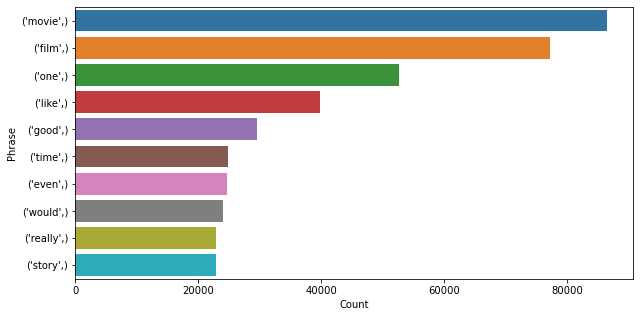

In [147]:
def plot_ngram(tokens, i):
    n_gram = (pd.Series(nltk.ngrams(tokens, i)).value_counts())[:10]
    n_gram_df = pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={'index': 'Phrase', 0: 'Count'})
#     print(n_gram_df.head(10))
    plt.figure(figsize = (10,5))
    return sns.barplot(x='Count',y='Phrase', data=n_gram_df)

plot_ngram(tokens, 1)